In [20]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [2]:
#User-supplied
summaoutfile = '/glade/p/work/manab/fcast/PNW/output/newsumma/final.nc'   #Output file from SUMMA
#routefile = '/glade/p/work/manab/fcast/PNW_route/output/q_out.nc'       #Output file from MizuRoute
polyshp = '/glade/p/work/manab/fcast/data/shapefile/Region_17_merged_hru.shp'  #Polygon shapefile
segshp =  '/glade/p/work/manab/fcast/data/shapefile/Region17_merged_seg.shp'   #Segment shapefile

## Imports SUMMA output, Polygon shapefile, and Reach shapefile

In [3]:
summaout = xr.open_dataset(summaoutfile).set_index(hru = 'hruId')        #Imports the SUMMA outfile
print(summaout)

<xarray.Dataset>
Dimensions:                 (hru: 11723, midToto: 8, time: 19248)
Coordinates:
  * time                    (time) datetime64[ns] 2010-06-01 ...
  * hru                     (hru) int64 17000001 17000002 17000003 17000004 ...
Dimensions without coordinates: midToto
Data variables:
    pptrate                 (time, hru) float64 ...
    airtemp                 (time, hru) float64 ...
    spechum                 (time, hru) float64 ...
    windspd                 (time, hru) float64 ...
    SWRadAtm                (time, hru) float64 ...
    LWRadAtm                (time, hru) float64 ...
    airpres                 (time, hru) float64 ...
    nSnow                   (time, hru) int32 ...
    nSoil                   (time, hru) int32 ...
    nLayers                 (time, hru) int32 ...
    numberFluxCalc          (time, hru) int32 ...
    scalarSWE               (time, hru) float64 ...
    scalarAquiferStorage    (time, hru) float64 ...
    scalarCosZenith         (time, 

In [4]:
#Extracts SUMMA variable for all 11723 HRUs at a particular timestep
summasel = summaout.isel(time = 50)['pptrate'].drop('time').to_dataframe()  
print(summasel.head(4))

          pptrate
hru              
17000001      0.0
17000002      0.0
17000003      0.0
17000004      0.0


In [19]:
polydat = gpd.read_file(polyshp)                #Imports the polygon shapefile
polydat = polydat[polydat.geometry.notnull()]
polydat = polydat.to_crs({'init': 'epsg:4326'}) #Reprojection for lat-long in map
polydat.head(2)

,OBJECTID,POI_ID,PROD_UNIT,hru_elev,hru_id2,Y_Centroid,X_Centroid,Basin_Area,seg_hru_id,Elev_Avg,Lon_Centro,Lat_Centro,geometry
0,1,23336004,17a,1829.0,17000001,2.213807e+06,-1.665466e+06,1.202901e+08,17001133,1890.24521,-116.20479,41.33139,POLYGON ((-116.1746602138565 41.40417605744236...
1,2,23198872,17a,1902.0,17000002,2.214667e+06,-1.555784e+06,1.248356e+08,17000804,1959.87124,-114.91219,41.53916,(POLYGON ((-114.6447601321217 41.5900497438992...


In [6]:
segdat = gpd.read_file(segshp)                #Imports the segment shapefile
segdat = segdat[segdat.geometry.notnull()]
segdat = segdat.to_crs({'init': 'epsg:4326'}) #Converts for lat-long in map
segdat.head(2)

,DrainID,Region,tosegment2,tosegment,seg_id,seg_id2,POI_ID,TOCOMID2,To_POI_ID,ToFTYPE,...,start_y,TopElev,start_lon,start_lat,end_x,end_y,BotElev,end_lon,end_lat,geometry
0,5447,17,17906894,6894,6892,17906892,0.0,0,0,None,...,3498210.0,1002.0,-119.58342,52.73771,-1605930.0,3495300.0,776.0,-119.24664,52.76475,LINESTRING (-119.5834239522043 52.737712193626...
1,5448,17,17906894,6894,6893,17906893,0.0,0,0,None,...,3490490.0,801.0,-119.26432,52.71579,-1605930.0,3495300.0,776.0,-119.24664,52.76475,LINESTRING (-119.2643240227966 52.715792233376...


# Merging SUMMA output into polygon shapefile

In [7]:
summasel['hru_id2'] = summasel.index   # 
print(summasel.index)

polydat = pd.merge(polydat, summasel)  #
polydat.head(2)

Int64Index([17000001, 17000002, 17000003, 17000004, 17000005, 17000006,
            17000007, 17000008, 17000009, 17000010,
            ...
            17906157, 17906158, 17906159, 17906160, 17906161, 17906162,
            17906163, 17906164, 17906165, 17906166],
           dtype='int64', name='hru', length=11723)


,OBJECTID,POI_ID,PROD_UNIT,hru_elev,hru_id2,Y_Centroid,X_Centroid,Basin_Area,seg_hru_id,Elev_Avg,Lon_Centro,Lat_Centro,geometry,pptrate
0,1,23336004,17a,1829.0,17000001,2.213807e+06,-1.665466e+06,1.202901e+08,17001133,1890.24521,-116.20479,41.33139,POLYGON ((-116.1746602138565 41.40417605744236...,0.0
1,2,23198872,17a,1902.0,17000002,2.214667e+06,-1.555784e+06,1.248356e+08,17000804,1959.87124,-114.91219,41.53916,(POLYGON ((-114.6447601321217 41.5900497438992...,0.0


# Plot SUMMA Output

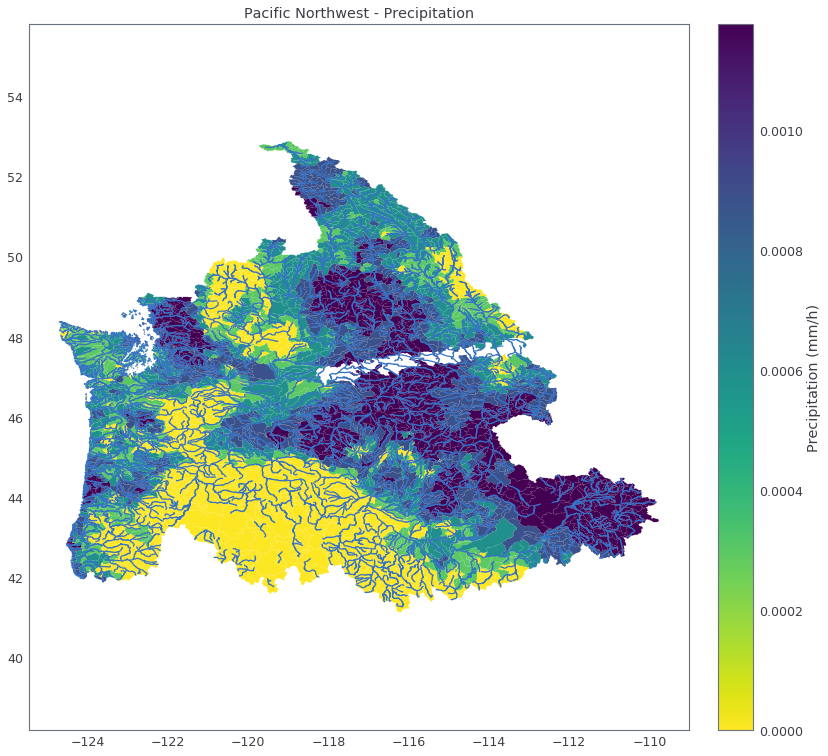

In [18]:
fig, ax = plt.subplots(1, figsize=(13, 13))
polydat.plot(ax = ax, column = 'pptrate', cmap='viridis_r', scheme='quantiles', label='name')  #Plots the polygons
segdat.plot(ax = ax)       #Overlays the segment. Comment out if not reuired

#Prepare colorbar
vmin = polydat['pptrate'].min()
vmax = polydat['pptrate'].max()
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, fraction=0.050, pad=0.04)
cbar.ax.set_ylabel('Precipitation', rotation=90)

#Set axes
ax.set_title('Pacific Northwest - Precipitation')
ax.set_ylim([-90, 90])
ax.grid(False) #ax.set_axis_off()
plt.axis('equal');